In [ ]:
! brew install graphviz

In [2]:
from typing import Any
from energy_box_control.network import Network
import graphviz

%load_ext autoreload 
%autoreload 2

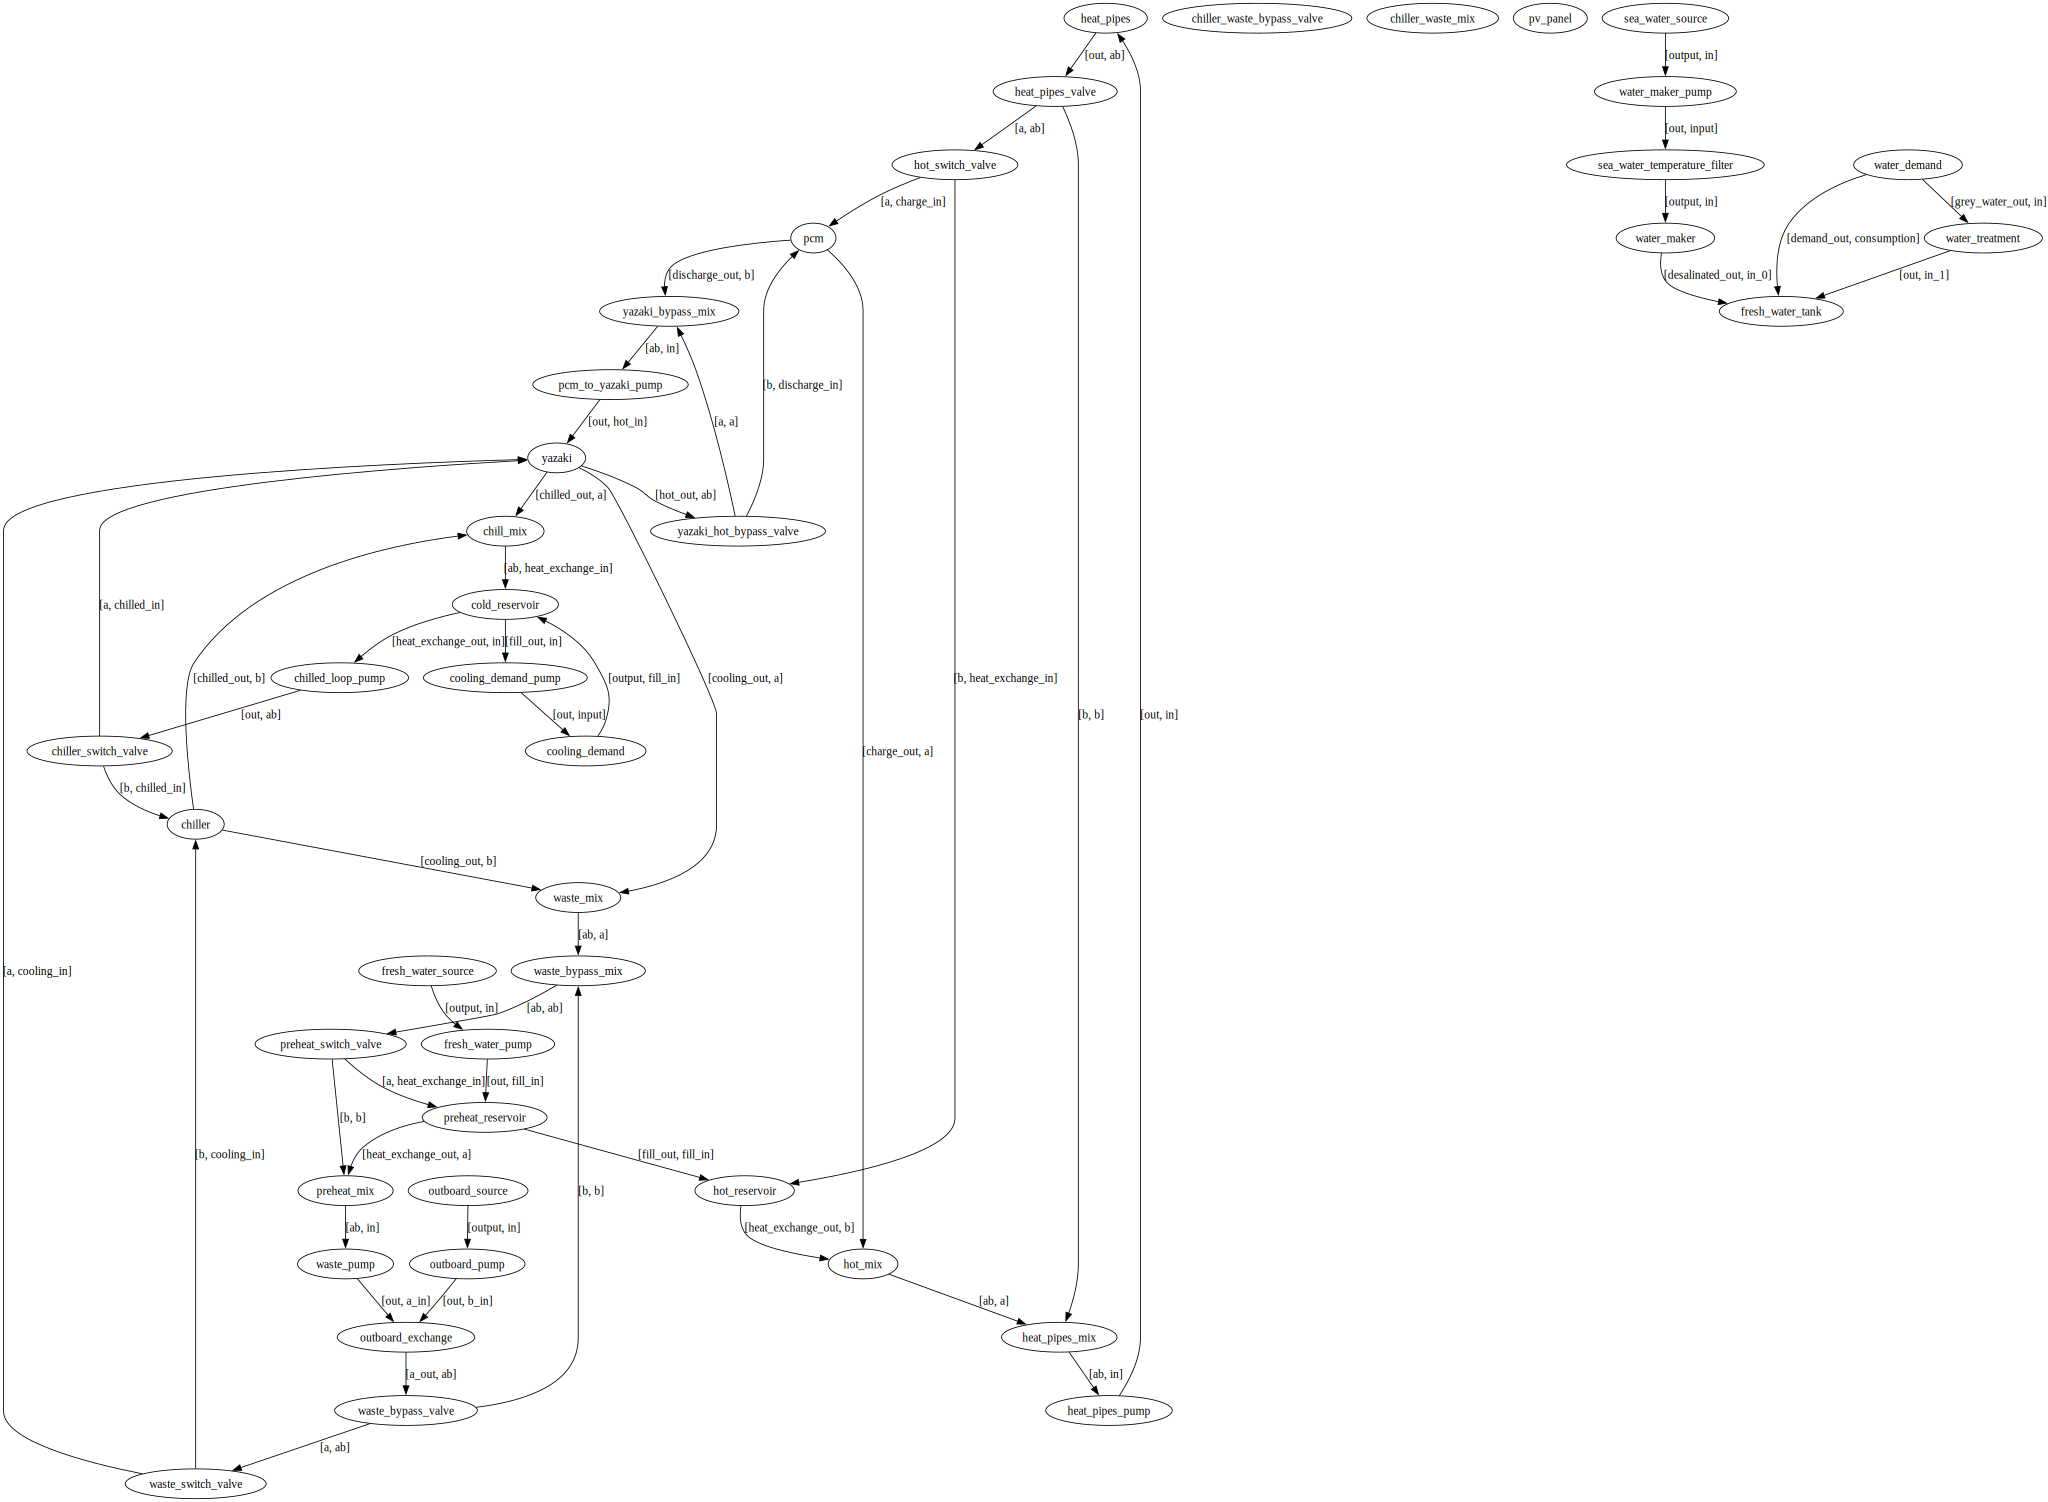

In [13]:
from dataclasses import fields

from energy_box_control.appliances.base import BaseAppliance
from energy_box_control.power_hub.network import PowerHub, PowerHubSchedules


def draw(network: Any, name: str):
    dot = graphviz.Digraph(name=name)

    for field in fields(network):
        if isinstance(getattr(network, field.name), BaseAppliance):
          dot.node(str(getattr(network, field.name).id), field.name)
    
    for connection in network.connections().connections + network.feedback().feedbacks:
      dot.edge(str(connection.from_app.id), str(connection.to_app.id), label=f"[{connection.from_port.value}, {connection.to_port.value}]")

    return dot
    
network = PowerHub.power_hub(PowerHubSchedules.const_schedules())

dot = draw(network, "PowerHub")
dot

In [16]:
dot.render("result")

'result.pdf'